# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from matplotlib import pyplot as plt
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc_resp = requests.get(btc_url)
my_btc_data = my_btc_resp.json()
print(json.dumps(my_btc_data, indent=4))
BTC = my_btc_data['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
my_eth_resp = requests.get(eth_url)
my_eth_data = my_eth_resp.json()
print(json.dumps(my_eth_data, indent=4))
ETH = my_eth_data['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * BTC
my_eth_value = my_eth * ETH
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19000656,
            "total_supply": 19000656,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46781.0,
                    "volume_24h": 28233561187,
                    "market_cap": 889759795502,
                    "percentage_change_1h": 0.515404314912796,
                    "percentage_change_24h": 3.36949303136752,
                    "percentage_change_7d": 5.52481094533251,
                    "percent_change_1h": 0.515404314912796,
                    "percent_change_24h": 3.36949303136752,
                    "percent_change_7d": 5.52481094533251
                },
                "CAD": {
                    "price": 58569.812,
                    "volume_24h": 35348418606.124,
                    "mark

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# lastbusday_obj = datetime.datetime.today()-BDay(1)
# lastbusday_str = datetime.datetime.strptime(str(lastbusday_obj),'%Y-%m-%d %H:%M:%S')

start_date = pd.Timestamp("2022-03-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-25", tz="America/New_York").isoformat()

ticker_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
ticker_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-21 04:00:00+00:00  107.58  107.649  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.880  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.210  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.035  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.650  105.9750  106.10  10295813   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-21 04:00:00+00:00       27316  107.310151  444.45  446.46  440.68   
2022-03-22 04:00:00+00:00       51796  106.746967  445.99  450.58  445.86   
2022-03-23 04:00:00+00:00       27348  106.991875  446.90  448.49  443.71   
2022-03-24 04:00:00+00:00       23320  106.879605  445.82  450.50  444.76   
2022-03-25 04:00:00+00:00       37569  106.190724  451.09  452.98  448.43   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-21 04:00:00+00:00  444.30  85377983      912432  443.796432  
2022-03-22 04:00:00+00:00  449.59  73674202      623610  448.558595  
2022-03-23 04:00:00+00:00  443.80  77982935      627281  446.058683  
2022-03-24 04:00:00+00:00  450.48  61411569      526865  447.609014  
2022-03-25 04:00:00+00:00  452.69  77199328      661033  451.047221

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = ticker_data["AGG"]["close"][-1]
spy_close_price = ticker_data["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([crypto_value, shares_value], columns=['amount'], index=['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,93606.448568
shares,43854.500000


([<matplotlib.patches.Wedge at 0x7fa50a825220>,
 [Text(-0.5922300827830898, 0.9269646859760812, 'crypto'),
  Text(0.5922303431491585, -0.9269645196302986, 'shares')],
 [Text(-0.323034590608958, 0.5056171014414987, '93606.0'),
  Text(0.3230347326268137, -0.5056170107074355, '43855.0')])

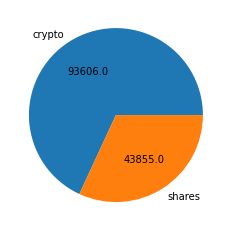

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_amount = df_savings['amount']
def act_value(val):
    a  = np.round(val/100.*savings_amount.sum(), 0)
    return a
plt.pie(savings_amount,labels = ['crypto','shares'], autopct=act_value)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = np.sum(df_savings['amount'])
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrat!! you have enough money in the fund")
elif total_savings == emergency_fund:
    print("You've reached this financial goal")
else:
    print(f"You're {total_savings-emergency_fund} away from reaching the goal")
    

Congrat!! you have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

ticker_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_stkbond_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stkbond_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 110.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 120.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 130.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 140.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 150.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 160.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 170.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 180.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 190.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 200.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 210.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 220.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 230.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 240.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 250.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 260.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 270.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 280.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 290.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 300.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 310.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 320.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 330.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 340.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 350.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 360.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 370.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 380.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 390.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 400.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 410.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 420.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 430.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 440.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 450.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 460.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 470.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 480.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 490.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000639,0.996753,1.001314,1.006126,1.007246,1.000023,0.998375,0.991731,1.001326,0.997627,...,1.006965,0.995521,1.002688,1.001214,1.006141,1.008193,0.995016,1.000297,1.002068,0.998823
2,0.998249,1.002915,1.006147,1.011480,1.011287,1.003858,1.000495,0.988611,1.003570,0.996401,...,1.003147,0.996250,1.008122,1.002257,1.001700,1.009276,1.002183,1.000438,1.003892,1.000058
3,0.995809,1.000319,1.012265,1.017496,1.014633,1.005612,1.005078,0.995691,1.008983,0.995684,...,1.007196,1.004227,1.009193,1.005611,1.009585,1.008864,1.003416,1.001751,1.003080,0.999491
4,0.997810,1.005029,1.018355,1.022794,1.014625,1.006558,1.005275,0.994208,1.010942,0.998921,...,1.007112,1.006343,1.004734,1.011969,1.010364,0.997869,1.004861,0.998176,1.004352,0.995724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.020865,6.206903,4.824701,3.985831,5.660396,10.743286,6.988211,6.897282,7.673408,3.541492,...,6.553790,6.726244,2.943849,16.756399,8.364153,11.458015,14.762741,13.229729,5.607481,10.109912
7557,5.987508,6.195151,4.851345,3.992758,5.677569,10.746123,6.969710,6.942369,7.654429,3.553376,...,6.572315,6.724611,2.947516,16.741636,8.366792,11.475701,14.598118,13.130695,5.607168,10.177533
7558,5.957617,6.177570,4.883018,3.995975,5.705820,10.761845,7.004540,6.972920,7.683038,3.529311,...,6.598111,6.689764,2.912576,16.755836,8.423521,11.424392,14.571920,13.017177,5.657206,10.137139
7559,5.933688,6.194765,4.904140,3.995233,5.702429,10.826533,7.009125,6.869965,7.654036,3.508229,...,6.635832,6.684784,2.928666,16.594223,8.390437,11.487691,14.558137,12.920911,5.679054,10.129994


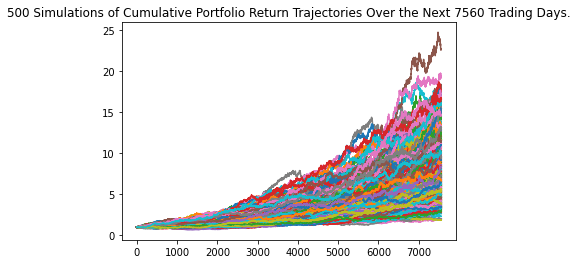

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_stkbond_dist.plot_simulation()

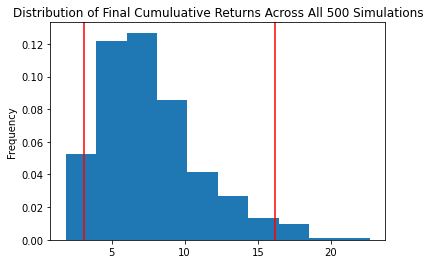

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stkbond_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

stkbond_tbl = MC_stkbond_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stkbond_tbl)

count           500.000000
mean              7.686585
std               3.403127
min               1.860750
25%               5.211039
50%               7.066747
75%               9.511767
max              22.678217
95% CI Lower      3.137346
95% CI Upper     16.209564
Name: 7560, dtype: float64


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stkbond_tbl[8]*initial_investment,2)
ci_upper = round(stkbond_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62746.93 and $324191.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62746.93 and $324191.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.8,0.2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_stkbond_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 110.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 120.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 130.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 140.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 150.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 160.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 170.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 180.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 190.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 200.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 210.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 220.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 230.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 240.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 250.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 260.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 270.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 280.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 290.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 300.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 310.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 320.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 330.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 340.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 350.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 360.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 370.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 380.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 390.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 400.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 410.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 420.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 430.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 440.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 450.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 460.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 470.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 480.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 490.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004945,1.000032,0.998371,1.001419,0.994661,0.996784,0.997206,1.004334,1.000045,0.998206,...,1.004613,1.002963,0.998284,1.004052,0.993933,1.006738,1.004172,1.003416,0.996758,1.000312
2,1.004547,1.002363,1.002549,1.012541,0.988679,0.991850,0.993527,1.003882,1.004419,1.001852,...,1.007900,1.002174,0.999141,1.004200,0.996585,1.007576,1.005672,1.000155,0.998901,1.006691
3,1.006303,1.006144,1.003138,1.008349,0.985536,0.999283,0.994736,0.999299,1.009980,1.001677,...,1.007308,1.004056,0.997916,1.008493,0.994789,1.013127,1.006878,1.000103,0.996137,1.011119
4,1.015308,1.004024,1.005140,1.004644,0.987568,0.997076,0.990029,0.999133,1.007584,1.005392,...,1.006384,0.998289,1.000581,1.007681,0.993202,1.010763,1.007251,0.998526,1.005314,1.007029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.158060,1.008366,1.109224,1.293837,1.044771,1.460982,1.224815,1.574166,1.213855,1.419795,...,0.956622,1.186464,1.185135,1.293260,1.127173,1.158678,1.538665,1.072361,1.285155,1.073425
1257,1.161647,1.011206,1.110333,1.295170,1.047045,1.453674,1.228098,1.572179,1.217450,1.423779,...,0.951204,1.189307,1.186501,1.287054,1.125399,1.156362,1.533477,1.073386,1.285668,1.079138
1258,1.163114,1.011714,1.112760,1.293527,1.047184,1.455767,1.230929,1.575421,1.213570,1.426436,...,0.958172,1.194580,1.186448,1.286115,1.123587,1.158686,1.533772,1.074864,1.281517,1.077699
1259,1.163501,1.013818,1.110617,1.290161,1.045762,1.455352,1.234516,1.581703,1.207285,1.424947,...,0.958891,1.190911,1.186228,1.281470,1.120380,1.159222,1.536924,1.079180,1.287188,1.082420


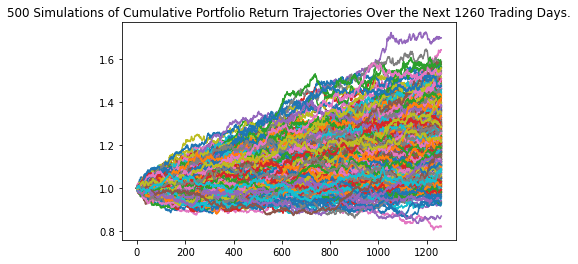

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_stkbond_dist.plot_simulation()

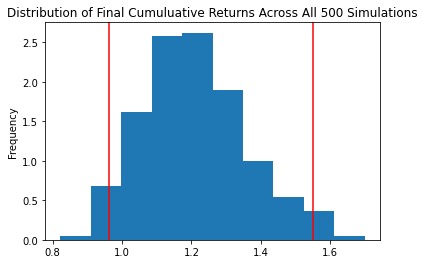

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stkbond_dist.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stkbond_tbl = MC_stkbond_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stkbond_tbl)

count           500.000000
mean              1.207848
std               0.148315
min               0.822340
25%               1.103544
50%               1.197151
75%               1.293853
max               1.699402
95% CI Lower      0.963275
95% CI Upper      1.549087
Name: 1260, dtype: float64


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stkbond_tbl[8]*initial_investment,2)
ci_upper_five = round(stkbond_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57796.5 and $92945.23


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.7,0.3],
    num_simulation = 500,
    num_trading_days = 252*10
)    

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 110.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 120.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 130.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 140.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 150.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 160.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 170.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 180.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 190.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 200.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 210.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 220.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 230.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 240.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 250.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 260.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 270.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 280.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 290.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 300.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 310.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 320.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 330.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 340.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 350.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 360.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 370.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 380.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 390.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 400.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 410.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 420.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 430.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 440.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 450.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 460.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 470.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 480.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

Running Monte Carlo simulation number 490.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:117: PerformanceWarnin

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001143,1.004639,0.996124,1.004966,1.005371,1.000337,0.999988,1.010105,1.000696,1.002366,...,0.998394,0.998247,1.002843,0.992705,1.007241,1.004141,1.001315,1.000287,0.997178,1.004792
2,0.997907,1.006774,0.998546,1.003227,1.009100,1.005052,1.002704,1.007504,1.002656,0.994466,...,1.000294,0.999290,1.003487,0.999520,1.010259,1.003065,0.993712,0.999729,0.998958,1.001537
3,0.992714,0.998017,0.986016,1.006661,1.005591,1.004286,1.002487,1.004055,1.004455,0.994537,...,0.999190,1.004166,1.005532,0.995693,1.008184,1.005874,0.992067,1.000101,0.998721,1.004439
4,0.987135,1.001409,0.995027,1.016423,1.004826,1.010360,1.002676,1.005688,0.996814,0.996297,...,0.997799,1.002217,1.005083,0.994714,1.012770,1.004474,1.000112,1.006525,0.998820,1.007914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.275905,1.517357,1.159392,1.269731,1.089240,1.874859,2.217974,1.372725,2.174807,1.501237,...,1.499569,1.262920,1.992835,1.524007,1.374996,1.704078,1.803922,1.333268,1.577202,1.655488
2517,1.273294,1.519876,1.159877,1.262155,1.081869,1.871656,2.207843,1.374284,2.183777,1.501968,...,1.500502,1.264103,1.996145,1.525650,1.378587,1.702283,1.816991,1.329916,1.581016,1.649798
2518,1.276250,1.517197,1.153072,1.257174,1.082402,1.882120,2.213857,1.374555,2.185369,1.497204,...,1.503878,1.270647,1.987365,1.528522,1.366413,1.700816,1.824022,1.327912,1.579802,1.638494
2519,1.273067,1.516330,1.148525,1.254717,1.082746,1.874992,2.219310,1.370714,2.189984,1.496117,...,1.507497,1.270316,1.988102,1.521295,1.369081,1.708196,1.827487,1.322915,1.579068,1.648140


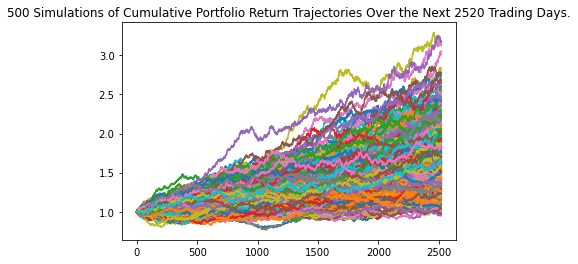

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_stkbond_dist.plot_simulation()

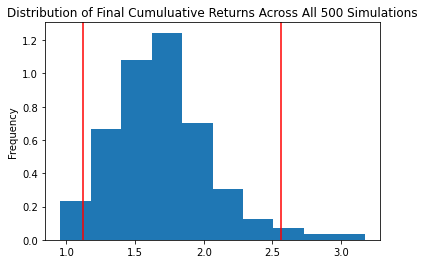

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stkbond_dist.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stkbond_tbl = MC_stkbond_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stkbond_tbl)

count           500.000000
mean              1.695332
std               0.360267
min               0.955612
25%               1.440603
50%               1.655210
75%               1.872274
max               3.172396
95% CI Lower      1.117900
95% CI Upper      2.565502
Name: 2520, dtype: float64


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stkbond_tbl[8]*initial_investment,2)
ci_upper_ten = round(stkbond_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67073.97 and $153930.12
